# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса — архив объявлений о продаже квартир в г. N и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Шаг 1. Откроем файл с данными и изучим общую информацию. 


In [1]:
import pandas as pd # импортировали библиотеку pandas
import matplotlib.pyplot as plt 
import seaborn as sns






In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t') # прочитали файл

In [3]:
print(data.head(5)) # вывели первые 5 строчек датафрейма 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

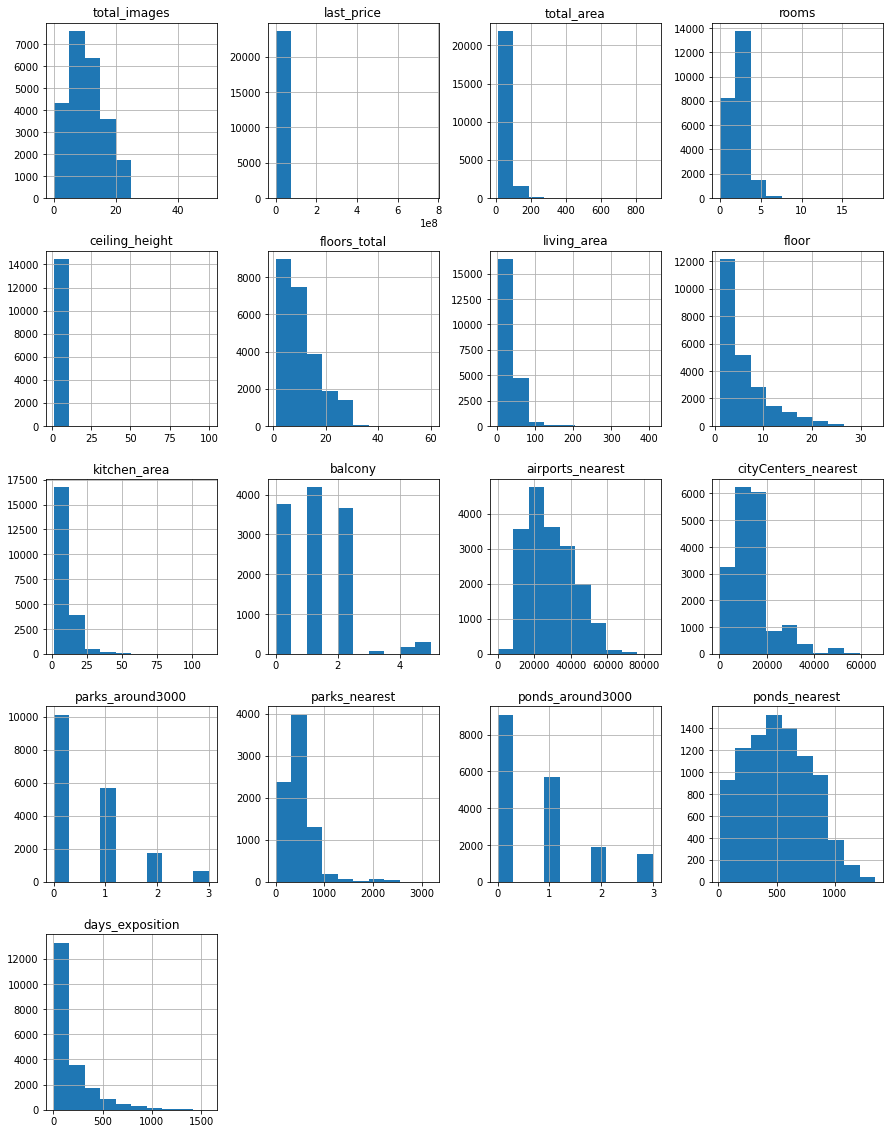

In [4]:
data.hist(figsize=(15,20))

* Вывод по гистограммам:
  * Значения по площади от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.

  * Последняя цена на недвижимость в 6,5 млн руб., медиана 4,65 млн руб. Распределение данных Гаусса.

  * Количество комнат колеблется от 0 до 19. Больше всего однокомнатных квартир.

  * Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.



In [5]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#    Шаг 2. Предобработка данных.


#   2.1 Найдем и изучим пропущенные значения в столбцах.

In [6]:
print(data.isna().sum())# количество пропущенных значений 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


* Причины пропуска данных возникают по причине сбоя (к примеру гео данные) или человеческого фактора. Жаль, что нельзя узнать у коллег.


* Выполним обработку пропущенных значений.

In [7]:
data['balcony'] = data['balcony'].fillna(0) # Заменили балконы на значение ноль
# заменим пропущенные значения числа размещения объявления !
data['days_exposition'].fillna(9999, inplace=True)


In [8]:
data['is_apartment'] = data['is_apartment'].fillna(value=False) # заменим пропущенные значение на нет

# заменим пропущенные парки на ноль 
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)

# заменим пропущенные значения прудов на ноль 
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)




# 2.2 Рассмотрим типы данных в каждом столбце.



In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* преобразуем тип данных в столбцах

In [10]:
data['last_price'] = data['last_price'].astype(int) # Приводим в целочисленный тип стоимость 

# дата публикации (время не несет смысловой нагрузки)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

# заменим тип число балконов на целочисленный тип 
data['balcony'] = data['balcony'].astype(int)

# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].astype(int)

# заменим число прудов на целочисленнный тип 
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

# заменим на целочисленнный тип !
data['days_exposition'] = data['days_exposition'].astype(int)





In [11]:
# удалим строки  с пропусками в столбцах с названием населенного пункта и количества этажей в доме
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# заменим количество этажей в доме на целые числа
data['floors_total'] = data['floors_total'].astype(int)


# заменим пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# Проверяем количество пропущенных значений
data.isnull().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

In [12]:

data['locality_name'] = data['locality_name'].str.lower()#привели к нижнему регистру

print(sorted(data['locality_name'].unique())) #отсортированный список 


['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг', 'высоцк', 'гатчина', 'городской поселок большая ижора', 'городской поселок янино-1', 'городской посёлок будогощь', 'городской посёлок виллози', 'городской посёлок лесогорский', 'городской посёлок мга', 'городской посёлок назия', 'городской посёлок новоселье', 'городской посёлок павлово', 'городской посёлок рощино', 'городской посёлок свирьстрой', 'городской посёлок советский', 'городской посёлок фёдоровское', 'городской посёлок янино-1', 'деревня агалатово', 'деревня аро', 'деревня батово', 'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда', 'деревня большая пустомержа', 'деревня большие колпаны', 'деревня большое рейзино', 'деревня большой сабск', 'деревня бор', 'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово', 'деревня глинка', 'деревня горбунки', 'деревня гостилицы', 'деревня заклинье', 'деревня заневка', 'деревня зимитицы', '

In [13]:
#Устраним не явные дубликаты в locality_name

data['locality_name'] =(
    data['locality_name']
    .str.replace('ё','е')
    .replace(['городской поселок'],'поселок городского типа', regex=True)
) # заменили  ё на е и городской поселок на поселок городского типа 

data['locality_name'].value_counts() # количество дубликатов

санкт-петербург               15651
поселок мурино                  552
поселок шушары                  439
всеволожск                      398
пушкин                          369
                              ...  
садовое товарищество садко        1
деревня хязельки                  1
село шум                          1
поселок жилпоселок                1
поселок форт красная горка        1
Name: locality_name, Length: 323, dtype: int64

In [14]:
data.duplicated().sum() # явные дубликаты

0

# Шаг 3.Посчитаем и добавим в таблицу новые столбцы

In [15]:
# цена одного кв.м 
data['price_sq_meters'] = data['last_price'] / data['total_area']
data['price_sq_meters'] = data['price_sq_meters'].astype(int)

# добавим  столбцы дня недели, месяца и годаprice_sq_meters
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


# функция для заполнения типа этажа квартиры
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1) # создали столбец

# расстояние до центра города переведем в м 
data['cityCenters_nearest_kilometers'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_kilometers'] = data['cityCenters_nearest_kilometers'].round()



# Шаг 4. Проведем исследовательский анализ данных

## Изучим параметры: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города, расстояние до ближайшего парка.

In [16]:
data['total_area'].unique() # перечень уникальных значений 


array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

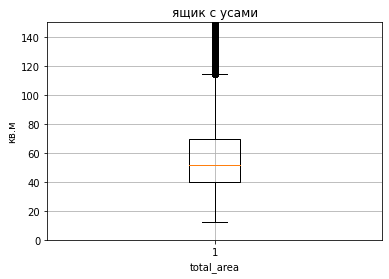

In [17]:

plt.boxplot(data['total_area'])
plt.ylim(0, 150)

plt.title("ящик с усами")
plt.xlabel("total_area")
plt.ylabel("кв.м")
plt.grid(True)

Большая часть данных лежит до 80 м2. Выбросы начинаются с величины порядка 120 м2.

In [18]:
# удалим строки - оставим строки в диапазоне с 19 по 163.4
data = data[(data.total_area > 19 )] 
data = data[(data.total_area < 164 )] 


In [19]:
sorted(data['total_area'].unique())  # перечень уникальных значений 

[19.5,
 20.0,
 20.1,
 20.3,
 20.5,
 20.6,
 20.67,
 20.8,
 21.0,
 21.1,
 21.3,
 21.4,
 21.57,
 21.6,
 21.7,
 21.8,
 21.89,
 21.9,
 22.0,
 22.2,
 22.23,
 22.3,
 22.4,
 22.5,
 22.7,
 23.0,
 23.06,
 23.29,
 23.3,
 23.39,
 23.4,
 23.5,
 23.55,
 23.6,
 23.69,
 23.7,
 23.8,
 23.98,
 24.0,
 24.05,
 24.1,
 24.2,
 24.26,
 24.3,
 24.4,
 24.42,
 24.5,
 24.6,
 24.62,
 24.64,
 24.7,
 24.75,
 24.8,
 24.9,
 25.0,
 25.07,
 25.2,
 25.27,
 25.3,
 25.33,
 25.36,
 25.41,
 25.48,
 25.5,
 25.55,
 25.6,
 25.63,
 25.7,
 25.8,
 25.9,
 26.0,
 26.05,
 26.09,
 26.1,
 26.18,
 26.2,
 26.23,
 26.4,
 26.45,
 26.49,
 26.5,
 26.6,
 26.69,
 26.7,
 26.8,
 26.9,
 27.0,
 27.1,
 27.11,
 27.2,
 27.3,
 27.32,
 27.36,
 27.4,
 27.5,
 27.55,
 27.56,
 27.6,
 27.7,
 27.8,
 27.81,
 27.9,
 28.0,
 28.01,
 28.05,
 28.1,
 28.16,
 28.2,
 28.3,
 28.4,
 28.49,
 28.5,
 28.6,
 28.61,
 28.66,
 28.7,
 28.71,
 28.8,
 28.86,
 28.9,
 29.0,
 29.1,
 29.14,
 29.2,
 29.24,
 29.3,
 29.4,
 29.45,
 29.5,
 29.54,
 29.6,
 29.62,
 29.7,
 29.8,
 29.84,
 29.

In [20]:
sorted(data['living_area'].unique())  # перечень уникальных значений 

[2.0,
 3.0,
 5.0,
 5.4,
 6.0,
 6.5,
 8.0,
 8.3,
 8.4,
 8.5,
 8.9,
 9.0,
 9.1,
 9.8,
 10.0,
 10.08,
 10.3,
 10.4,
 10.5,
 10.52,
 10.55,
 10.6,
 10.7,
 10.76,
 10.8,
 10.9,
 10.93,
 10.94,
 11.0,
 11.1,
 11.15,
 11.2,
 11.3,
 11.38,
 11.4,
 11.423477677212961,
 11.47,
 11.480595065599026,
 11.5,
 11.6,
 11.7,
 11.79,
 11.88,
 11.9,
 11.99,
 12.0,
 12.08,
 12.1,
 12.18,
 12.2,
 12.223121114617868,
 12.28,
 12.3,
 12.451590668162128,
 12.5,
 12.565825444934257,
 12.6,
 12.7,
 12.71,
 12.79,
 12.8,
 12.81,
 12.851412386864581,
 12.9,
 13.0,
 13.05,
 13.09,
 13.1,
 13.136999328794905,
 13.15,
 13.2,
 13.27,
 13.3,
 13.32,
 13.34,
 13.37,
 13.4,
 13.46,
 13.5,
 13.54,
 13.56,
 13.59,
 13.6,
 13.62,
 13.66,
 13.7,
 13.708173212655552,
 13.73,
 13.76,
 13.8,
 13.82,
 13.89,
 13.9,
 13.92,
 13.936642766199812,
 14.0,
 14.01,
 14.02,
 14.03,
 14.06,
 14.08,
 14.1,
 14.107994931358006,
 14.11,
 14.17,
 14.19,
 14.2,
 14.22,
 14.23,
 14.25,
 14.2793470965162,
 14.28,
 14.3,
 14.31,
 14.35,
 14.37,

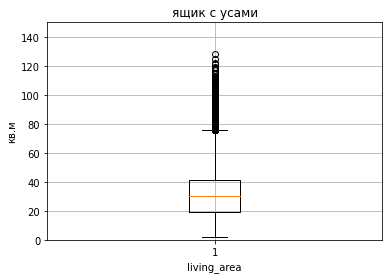

In [21]:
plt.boxplot(data['living_area'])
plt.ylim(0, 150)

plt.title("ящик с усами")
plt.xlabel("living_area")
plt.ylabel("кв.м")

plt.grid(True)

Выбросы начинаются с величины 80 м2. Стартовая величина подозрительно мала.

In [22]:
data[data['living_area'] < 10 ] # минимальная площадь на одного человека 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meters,weekday,month,year,floor_type,cityCenters_nearest_kilometers
114,5,4000000,21.40,2019-02-07,1,2.90,8,8.3,7,False,...,488.0,1,286.0,9999,186915,3,2,2019,другой,6.0
680,14,7200000,43.00,2017-10-31,1,3.00,8,9.0,2,False,...,2137.0,1,933.0,296,167441,1,10,2017,другой,5.0
1326,8,8100000,52.00,2017-01-29,2,2.70,25,9.0,15,False,...,NaN,1,1180.0,337,155769,6,1,2017,другой,16.0
2309,10,4200000,62.40,2017-06-15,2,2.60,9,8.4,6,False,...,NaN,0,NaN,111,67307,3,6,2017,другой,29.0
3242,7,4440000,41.00,2017-07-02,1,2.70,17,3.0,17,False,...,NaN,0,NaN,216,108292,6,7,2017,последний,13.0
4100,17,5300000,34.80,2017-06-19,1,2.70,23,9.0,15,False,...,NaN,0,NaN,30,152298,0,6,2017,другой,13.0
7312,8,3400000,27.00,2018-02-21,2,2.50,15,9.0,4,False,...,617.0,0,NaN,9999,125925,2,2,2018,другой,16.0
8325,9,4800000,52.00,2017-10-25,2,2.60,5,9.0,2,False,...,NaN,2,118.0,119,92307,2,10,2017,другой,13.0
13915,20,6350000,52.00,2018-02-06,2,3.00,6,2.0,2,False,...,NaN,1,1012.0,91,122115,1,2,2018,другой,7.0
15833,20,4600000,33.00,2017-01-01,1,2.70,22,9.0,12,False,...,NaN,0,NaN,511,139393,6,1,2017,другой,14.0


In [23]:
# удалим строки с площадью менее 10 м2
data = data[(data.living_area > 10)]

In [24]:
data['living_area'].min() # проверка

10.08

In [25]:
data['kitchen_area'].unique()  # перечень уникальных значений 

array([25.       , 11.       ,  8.3      , ..., 17.87     , 14.0584903,
       13.83     ])

In [26]:
sorted(data['kitchen_area'].unique()) # сортировка 

[1.3,
 2.0,
 2.3,
 2.89,
 3.0,
 3.2,
 3.3,
 3.4,
 3.413954679372134,
 3.5,
 3.501491978843214,
 3.5189994387374304,
 3.5890292783142943,
 3.606536738208511,
 3.618791960134462,
 3.641551657996943,
 3.676566577785375,
 3.7,
 3.729088957468023,
 3.746596417362239,
 3.7763590991824065,
 3.7816113371506717,
 3.7991187970448874,
 3.8,
 3.8166262569391036,
 3.832382970843898,
 3.8341337168333194,
 3.8516411767275356,
 3.8866560965159676,
 3.9041635564101838,
 3.9391784761986157,
 3.974193395987048,
 4.0,
 4.026715775669697,
 4.037220251606226,
 4.0792381553523445,
 4.094994869257139,
 4.096745615246561,
 4.1,
 4.114253075140777,
 4.1230068050878845,
 4.131760535034993,
 4.147517248939788,
 4.149267994929208,
 4.166775454823425,
 4.198288882633014,
 4.2,
 4.201790374611857,
 4.2105441045589656,
 4.219297834506073,
 4.236805294400289,
 4.247309770336819,
 4.271820214188721,
 4.275321706167565,
 4.289327674082937,
 4.3,
 4.306835133977153,
 4.310336625955997,
 4.31383811793484,
 4.3243425938713

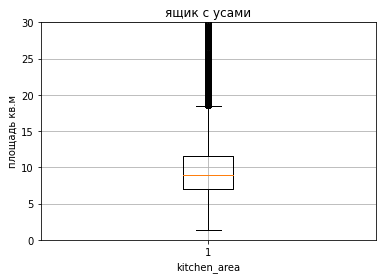

In [27]:
plt.boxplot(data['kitchen_area'])
plt.ylim(0, 30)

plt.title("ящик с усами")
plt.xlabel("kitchen_area")
plt.ylabel("площадь кв.м")
plt.grid(True)

Площадь более 20 м2 выбросы.

In [28]:
data = data[(data.kitchen_area > 8)] #(СП 54.13330.2016 кухня мин 8м2)

In [29]:
data['kitchen_area'].min() # минимальное значение кухни 10.01 м2 

8.01

In [30]:
data['last_price'].unique() #  перечень уникальных значений 

array([13000000,  3350000,  5196000, ...,  6151120, 21400000, 11475000])

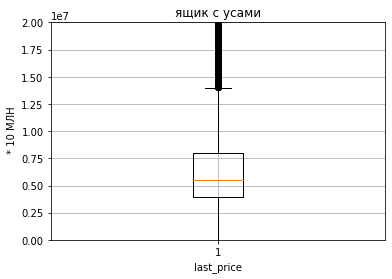

In [31]:
plt.boxplot(data['last_price'])
plt.ylim(0, 20000000)

plt.title("ящик с усами")
plt.xlabel("last_price")
plt.ylabel(" * 10 МЛН")
plt.grid(True)

Выбросы цена больше 12,5 млн .

In [32]:
data['rooms'].unique() #  перечень уникальных значений 

array([3, 1, 2, 5, 4, 6, 7, 0])

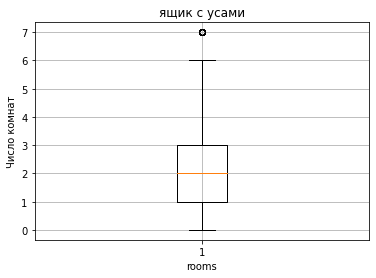

In [33]:
plt.boxplot(data['rooms'])
#plt.ylim(0, 11)

plt.title("ящик с усами")
plt.xlabel("rooms")
plt.ylabel("Число комнат")
plt.grid(True)

Болше 6 комнат выбросы .

In [34]:
# удалим аномальное значение
data = data[(data['rooms'] != 0 )]

In [35]:
#data['ceiling_height'].unique()
sorted(data['ceiling_height'].unique()) # сортировка значений 

[1.0,
 1.75,
 2.0,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.5,
 2.51,
 2.52,
 2.525,
 2.53,
 2.54,
 2.55,
 2.5549999999999997,
 2.56,
 2.565,
 2.57,
 2.575,
 2.58,
 2.59,
 2.5999999999999996,
 2.6,
 2.61,
 2.615,
 2.62,
 2.625,
 2.63,
 2.64,
 2.645,
 2.65,
 2.6500000000000004,
 2.66,
 2.67,
 2.675,
 2.68,
 2.7,
 2.71,
 2.715,
 2.72,
 2.725,
 2.73,
 2.7350000000000003,
 2.74,
 2.745,
 2.75,
 2.76,
 2.77,
 2.775,
 2.78,
 2.785,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.325,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3

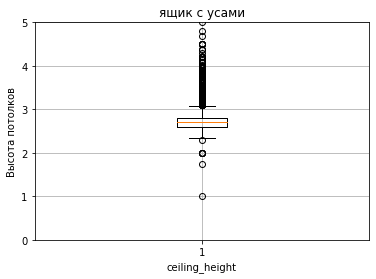

In [36]:
plt.boxplot(data['ceiling_height'])
plt.ylim(0, 5)

plt.title("ящик с усами")
plt.xlabel("ceiling_height")
plt.ylabel("Высота потолков")
plt.grid(True)

Выбросы более 3 м и менее 2 м.

In [37]:
# Удалим строки с аномальными значениями - оставим диапазон значений от 2.4 до 4.5

data = data[(data.ceiling_height > 2.34)]
data = data[(data.ceiling_height < 4.65)]
#(data.celing_height < 4.65)]

In [38]:
# заменим строки - обработка аномалий с понятной природой аномалии
data = data.replace(25, 2.5)
data = data.replace(3, 3.0)
data = data.replace(2, 2.5)
data = data.replace(32, 3.2)
data = data.replace(27, 2.7)
data = data.replace(24, 2.4)
data = data.replace(26, 2.6)
data = data.replace(27.5, 2.75)

    

In [39]:
#data['ceiling_height'].unique() # Проверка
sorted(data['ceiling_height'].unique())

[2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.5,
 2.51,
 2.52,
 2.525,
 2.53,
 2.54,
 2.55,
 2.5549999999999997,
 2.56,
 2.565,
 2.57,
 2.575,
 2.58,
 2.59,
 2.5999999999999996,
 2.6,
 2.61,
 2.615,
 2.62,
 2.625,
 2.63,
 2.64,
 2.645,
 2.65,
 2.6500000000000004,
 2.66,
 2.67,
 2.675,
 2.68,
 2.7,
 2.71,
 2.715,
 2.72,
 2.725,
 2.73,
 2.7350000000000003,
 2.74,
 2.745,
 2.75,
 2.76,
 2.77,
 2.775,
 2.78,
 2.785,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.325,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 

In [40]:
data['floor_type'].unique() # уникальные значения 

array(['другой', 'первый', 'последний'], dtype=object)

Больше всего этажей по типу другой, ведь первый и последний всего два.

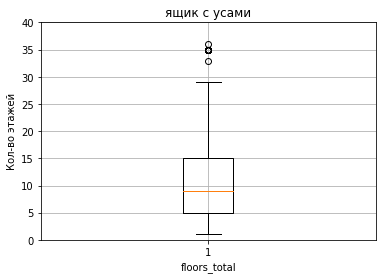

In [41]:
plt.boxplot(data['floors_total'])
plt.ylim(0, 40)

plt.title("ящик с усами")
plt.xlabel("floors_total")
plt.ylabel("Кол-во этажей")
plt.grid(True)

Боллее 30 этажей выбросы.

In [42]:
# удалим  строки с числом этажей более 37 (ЖК Невский спб )
data = data[(data.floors_total < 37)]

In [43]:
data['floors_total'].unique() # прооверка

array([16. , 11. ,  5. , 14. , 12. ,  2.6,  2.4,  2.7, 17. ,  2.5,  3. ,
       23. ,  6. , 19. , 18. ,  9. ,  4. ,  8. , 10. ,  7. , 13. , 15. ,
       22. , 20. , 28. , 21. , 35. ,  1. , 29. , 36. , 33. ])

In [44]:
data['cityCenters_nearest'].unique() # уникальные значения 

array([16028., 18603., 13933., ...,  4946.,  9167.,  9217.])

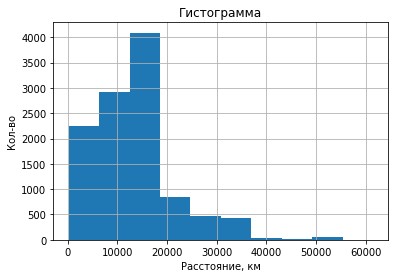

In [45]:
data['cityCenters_nearest'].hist()

plt.title('Гистограмма')
plt.xlabel('Расстояние, км')
plt.ylabel("Кол-во")
plt.grid(True)

Более 35 км до центра выбросы.

In [46]:
print(data['cityCenters_nearest'].describe())

count    11098.000000
mean     13575.379618
std       8085.201147
min        181.000000
25%       8248.000000
50%      12944.000000
75%      16186.000000
max      61495.000000
Name: cityCenters_nearest, dtype: float64


In [47]:
data['cityCenters_nearest'].max() # махимум 

61495.0

In [48]:
data['parks_nearest'].unique() # уникальны значения 

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       4.200e+02, 4.110e+02, 4.520e+02, 5.320e+02, 7.250e+02, 4.700e+01,
       5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02, 6.480e+02, 5.110e+02,
       6.660e+02, 3.840e+02, 1.270e+02, 5.170e+02, 2.410e+02, 1.560e+02,
       5.760e+02, 1.410e+02, 3.660e+02, 5.890e+02, 3.440e+02, 4.410e+02,
       7.490e+02, 1.000e+01, 1.133e+03, 1.205e+03, 5.160e+02, 2.760e+02,
       9.800e+02, 4.630e+02, 5.910e+02, 2.390e+02, 1.021e+03, 4.850e+02,
       3.700e+02, 6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02,
       2.510e+02, 5.370e+02, 6.270e+02, 4.500e+02, 6.570e+02, 5.780e+02,
       7.700e+01, 1.210e+02, 7.500e+01, 2.150e+02, 3.980e+02, 5.000e+01,
       3.200e+02, 7.410e+02, 2.295e+03, 6.340e+02, 3.490e+02, 9.300e+01,
       5.130e+02, 1.510e+03, 3.600e+01, 5.570e+02, 4.210e+02, 1.060e+02,
       5.080e+02, 6.300e+02, 3.010e+02, 3.850e+02, 4.710e+02, 8.030e+02,
       4.010e+02, 1.850e+02, 3.920e+02, 1.820e+02, 

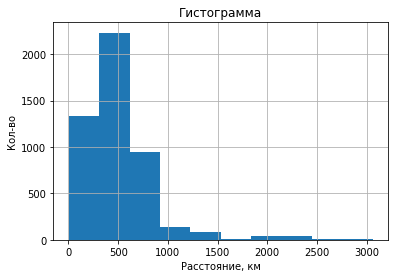

In [49]:
data['parks_nearest'].hist()

plt.title('Гистограмма')
plt.xlabel('Расстояние, км')
plt.ylabel("Кол-во")
plt.grid(True)

Выбросы с расстоянием до ближайшего парка более 1,5 км.

In [50]:
data['parks_nearest'].max() # максимум

3064.0

In [51]:
data['parks_nearest'].min() # минимум 

2.4

# Построим гистограммы :

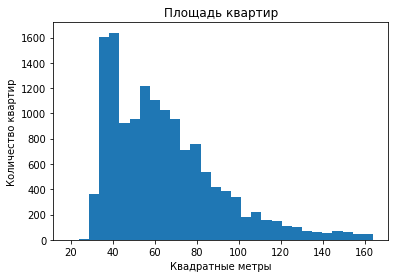

In [52]:


# Гистограмма с площадью
plt.hist(data['total_area'], bins=30, range=(19,164))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()



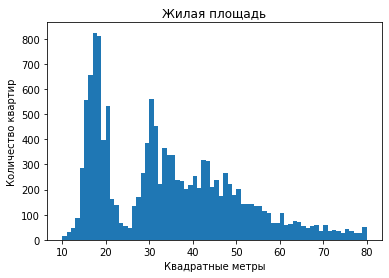

In [53]:
# Гистограмма  с жилой площадью
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

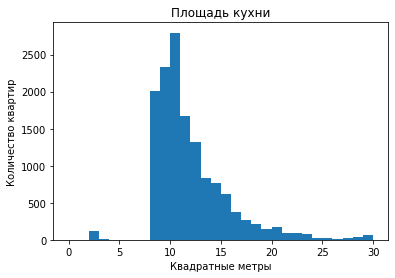

In [54]:
# Гистограмма  с площадью кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()


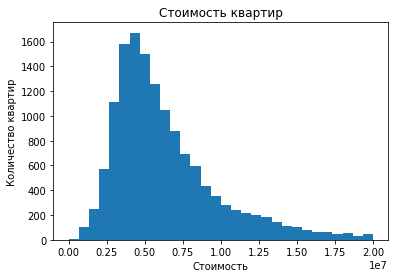

In [55]:
# Гистограмма со стоимостью
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

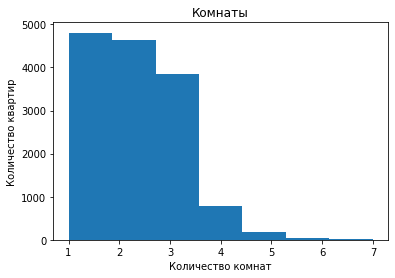

In [56]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

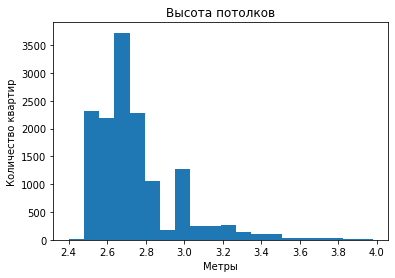

In [57]:
# Гистограмма с потолками
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

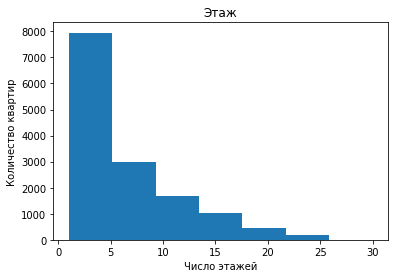

In [58]:
# Гистограмма этажа 
plt.hist(data['floor'], bins=7, range=(1,30))
plt.title('Этаж')
plt.xlabel('Число этажей')
plt.ylabel('Количество квартир')
plt.show()

<AxesSubplot:>

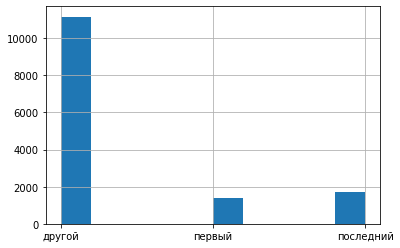

In [59]:
data['floor_type'].hist()

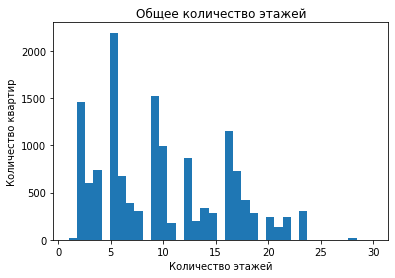

In [60]:
# Гистограмма по общему количеству этажей
plt.hist(data['floors_total'], bins=37, range=(1,30))
plt.title('Общее количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

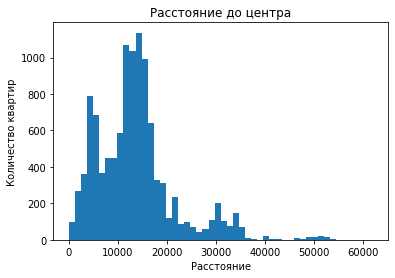

In [61]:
# Гистограмма по расстоянию до центра города в метрах 
plt.hist(data['cityCenters_nearest'], bins=50, range=(1,62000))
plt.title('Расстояние до центра')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

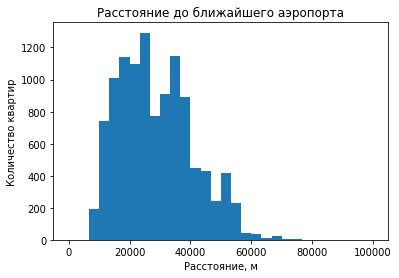

In [62]:
# Гистограмма по расстоянию до ближайшего аэропорта 
plt.hist(data['airports_nearest'], bins=30, range=(1,100000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

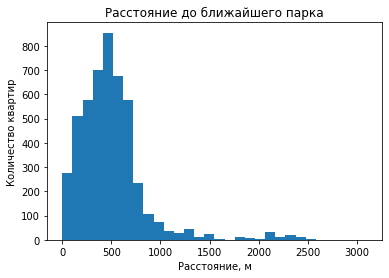

In [63]:
# Гистограмма по расстоянию до ближайшего парка 
plt.hist(data['parks_nearest'], bins=30, range=(1,3100))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

# Вывод:

* Общая площадь:

Гистограмма наглядно показывает, что пиковое значение по числу квартир занимают площадь с 25 до 40 м2. А,это значит, что большинство квартир на рынке недвижимости занимаю именно однушки. Есть варианты с значением по площади более 164 м2(клубный дом).


* Жилая площадь:

Гистограмма наглядно показывает, что есть два. Подобное распределение нам говорит, что на рынке недвижимости наблюдается два пика с минимальной жилой площадью. Левый пик с жилой площадью порядка 20м2 и правый порядка 30 м2.


* Площадь кухни:

Гистограмма говорит о том, что мы просеили значения т.е убрали кухни менее 8 м2 и увидели, что значения локализованы справа от пикового значения равной порядка 12 м2.


* Цена обьекта:

гистограмма показывает, что основная масса недвижимости на рынке занимает цену порядка 5 млн руб, справа от пика значения до 20 млн.руб.

* Количество комнат:

Гистограмма количества комнат, говорить нам, что недвижимость представляет набор квартир с пиковым значением однушек,двушек и тд. Редкий показатель 7 комнат. 


* Высота потолков:

На гистограмме наглядно видно, что на рынке недвижимости два пиковых значения порядка 2,7 м и 3 м. Что говорит, о том что основной класс недвижимости занимает эконом класс с высотой 2,5 м - 2,7 м. Далее идет комфорт класс с высотой потолков порядка 2,8 м. Следом идет бизнес,элитное, делюкс с высотой до 3,6 м.


* Общее количество этажей в доме: 

Распределение общего количества этажей выглядет логичным, похоже на типовую застройку, которая характеризиется определенным набором этажей (классификацией).На гистограммме представлены значения в основной массе своей дома 5, 10, 12-15, 17, 20, 25. Есть дома менее 5 этажей.


* Растояние до центра города в метрах:

График показывает что основная масса недвижимости расположена на удаленности 15 км, районы преимущественно новые территориально расположены перед КАДом, 5 км это старая часть города. Далее 30 км похоже на частные дома.



* Расстояние до ближайшего парка:

Пиковое значение 500м, относится к новой застройке окраины питера, в центре же расстояние до парка больше. 

## Изучим как быстро продавались  квартиры 

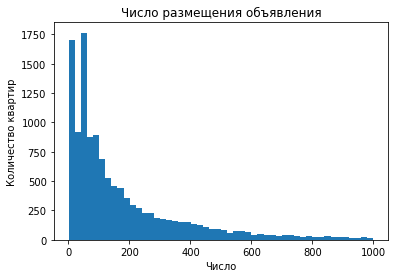

In [64]:
# Гистограмма числа дней размещения объявления
plt.hist(data['days_exposition'], bins=50, range=(1,999))
plt.title('Число размещения объявления')
plt.xlabel('Число')
plt.ylabel('Количество квартир')
plt.show()

In [65]:
data['days_exposition'].min() # минимальное число дней 

1.0

In [66]:
data = data[(data.days_exposition > 10)] # предположение, о том что за один день человек не купит недвижимость
data = data[(data.days_exposition < 365)] # рассмотрим до года

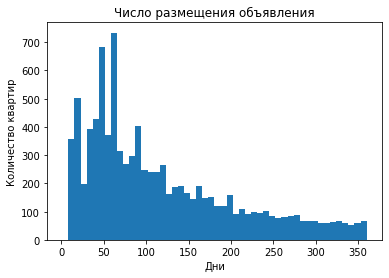

In [67]:
# Гистограмма числа дней размещения объявления
plt.hist(data['days_exposition'], bins=50, range=(1,360))
plt.title('Число размещения объявления')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [68]:
data.query('days_exposition != 9999')['days_exposition'].describe() # описание даных

count    9393.000000
mean      117.749920
std        89.184029
min        11.000000
25%        46.000000
50%        90.000000
75%       169.000000
max       364.000000
Name: days_exposition, dtype: float64

### Вывод: 

* Медианное время продажи 77 дней. 
* Среднее время продажи 94 дня. 
* Минимальное время 11 дней, даже если человек захочет сразу в первый день купить квартиру, то продавец сразу не снимет обЪявление, порядка только 5-7 дней будет проводится проверка документов, если была проведена предпродажная подготовка. Далее выход на сделку и того не менее одной неделе, если человек купит квартиру после первого просмотра, а таких просмотров бывает 2, 3 и более и на самом деле может растянуться на 2- 3 месяца. Поэтому минимальное время 11 дней. 

* До 30 дней можно считать продажи быстрыми.Аномально долгими можно считать продажи от полугода до года. 







## Изучим зависит ли цена от общей площади, жилой площади, площади кухни, количества комнат, этажа, даты размещения:

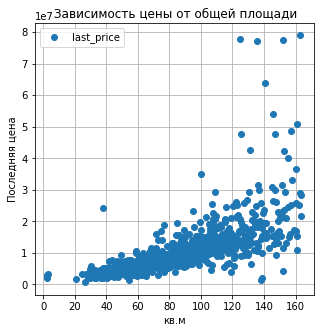

In [87]:

# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

plt.title(' Зависимость цены от общей площади')
plt.xlabel('кв.м')
plt.ylabel('Последняя цена')


plt.show()

На графике зависимости цены от площади наглядно видно, что цена практически прямопропорционально зависит от общей площади.

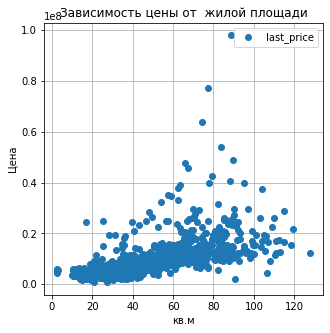

In [90]:
# Зависимость цены от жилой площади 
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

plt.title('Зависимость цены от  жилой площади')
plt.xlabel('кв.м')
plt.ylabel('Цена')

plt.show()

На графике зависимости жилой площади от цены видно, что наблюдается также прямая зависимость , но с  меньшим углом наклона и медленным ростом, слабой связью.

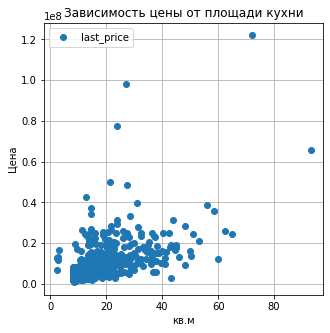

In [92]:
# Зависимость цены от площади кухни 
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)

plt.title('Зависимость цены от площади кухни')
plt.xlabel('кв.м')
plt.ylabel('Цена')
plt.show()

На зависимости цены от площади кухни наблюдается слабая связь.

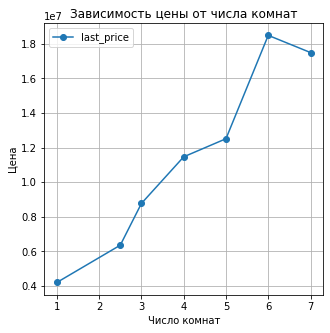

In [93]:
# Зависимость цены  от числа комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

На графике зависимости цены от числа комнта наблюдается прямая зависимость, участок с 6 - 7 комнат показывает резкий спад. 

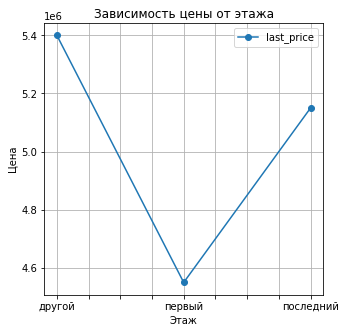

In [97]:
# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

На графике зависимости цены от типа этаж наблюдается резкий спад цены на первые этажи, логично. Квартиры на первых этажах всегда были дешевле. Последние этажи тоже не все любят, по углу наклонной видно, что рост цены и предпочтения все - таки больше к другому этажу, нежели к последнему.

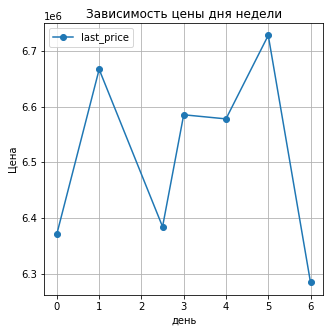

In [98]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)


plt.title('Зависимость цены дня недели')
plt.xlabel('день')
plt.ylabel('Цена')
plt.show()

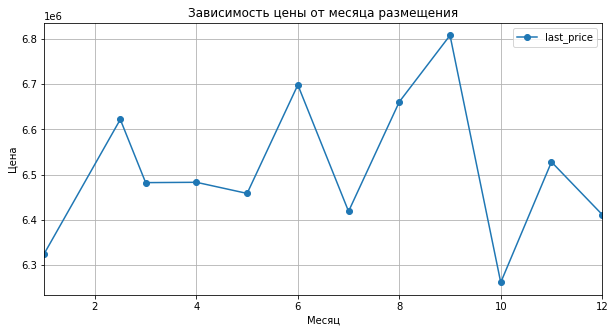

In [100]:
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)



plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

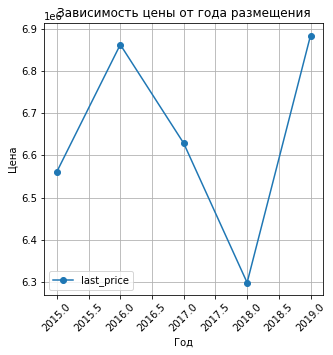

In [102]:
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

# Поворот меток для улучшения читаемости
plt.xticks(rotation=45)



plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена')

plt.show()

На графике отчетливо видны два кризиса 2014 и 2018 ковидный, и связанные с эти изменения цены, просто люди хотели сохранить свои деньги и стали вкладыватся недвижимость, следом за спросом росли цены . 

* Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Опираясь на графики основной в клад в стоимость квартиры вностит общая площадь. Слабое влияние на цену оказывает жилая площадь. На зависимости цены от площади кухни наблюдается слабая связь. Число комнат и  общая площадь схожи по влиянию на цену, логично.

На графике зависимости цены от типа этажа наблюдается резкий спад цены на первые этажи, логично. Квартиры на первых этажах всегда были дешевле. Последние этажи тоже не все любят, по углу наклонной видно, что рост цены и предпочтения все - таки больше к другому этажу, нежели к последнему.

Если рассмотреть начало недели, середину  и воскресенье, то цена в целом не меняется, есть рост и в конце недели спад. 

В течении года, особенно видно на протяжении пятилетки как состояние экономики и желание людей сохранить свои средсва ведут к росту цены. 



In [77]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений

locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_sq_meters', aggfunc=['count', 'mean']) # применим две функции
locality_pivot_table.columns = ['count', 'mean'] # столбцы count, mean 
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10) # по убыванию топ 10 
locality_pivot_table

,count,mean
locality_name,,
санкт-петербург,6252,116039.625080
поселок мурино,340,84680.311765
поселок шушары,280,77605.642857
поселок парголово,201,88365.870647
всеволожск,193,71727.466321
деревня кудрово,181,91308.679558
пушкин,131,106252.167939
колпино,109,75008.899083
кудрово,99,97235.575758


## Подсчитаем среднюю цену одного кв.м в 10 населенных пунктах.

* Самая высокая стоимость в СПБ, следом поселок Мурино, самая низкая стоимоcть Гатчина

## Вычисли среднюю цену каждого километра

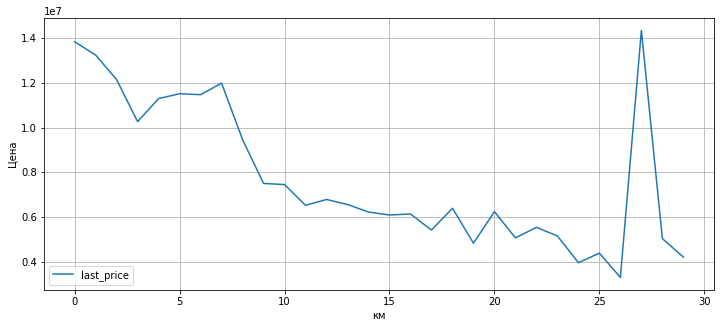

In [114]:

data['cityCenters_nearest_kilometers'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_kilometers'] = data['cityCenters_nearest_kilometers'].fillna(999999)
data['cityCenters_nearest_kilometers'] = data['cityCenters_nearest_kilometers'].astype('int')


(
    data.query('locality_name == "санкт-петербург" and cityCenters_nearest_kilometers != 999999')
    .pivot_table(index = 'cityCenters_nearest_kilometers', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12, 5))
)



plt.xlabel('км')
plt.ylabel('Цена')

plt.show()


* Центром города будем считать 3 км, стоимость с 14 млн уменьшаеться до 11 млн.


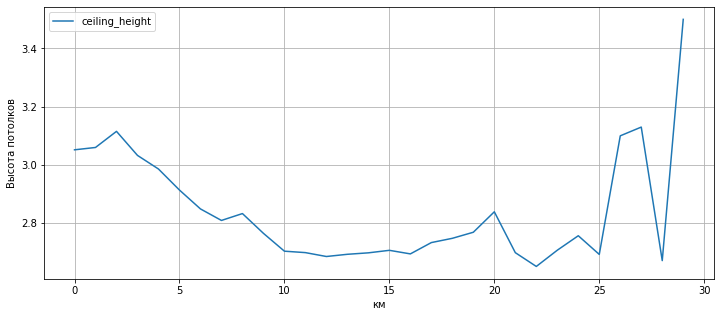

In [116]:
(
    data.query('locality_name == "санкт-петербург" and cityCenters_nearest_kilometers != 999999')
    .pivot_table(index = 'cityCenters_nearest_kilometers', values = 'ceiling_height', aggfunc = 'mean')
    .plot(grid=True, figsize=(12, 5))
)


plt.xlabel('км')
plt.ylabel('Высота потолков')

plt.show()

* График показывает, что в радиусе 10 км макс высота потолков с 0 до 3 км, похоже на древнюю часть города. 
А это говорит, о том что это центр.

### Общий вывод

* Общая площадь:

Гистограмма наглядно показывает, что пиковое значение по числу квартир занимают площадь с 25 до 40 м2. А,это значит, что большинство квартир на рынке недвижимости занимаю именно однушки . Есть варианты с значением по площади более 164 м2(клубный дом).

* Жилая площадь:

Гистограмма наглядно показывает, что есть два. Подобное распределение нам говорит, что на рынке недвижимости наблюдается два пика с минимальной жилой площадью. Левый пик с жилой площадью порядка 20м2 и правый порядка 30 м2.

* Площадь кухни:

Гистограмма говорит о том, что мы просеили значения т.е убрали кухни менее 8 м2 и увидели, что значения локализованы справа от пикового значения равной порядка 12 м2.

* Цена обьекта:

гистограмма показывает, что основная масса недвижимости на рынке занимает цену порядка 5 млн руб, справа от пика значения до 20 млн.руб.

* Количество комнат:

Гистограмма количества комнат, говорить нам, что недвижимость представляет набор квартир с пиковым значением однушек,двушек и тд. Редкий показатель 7 комнат.

* Высота потолков:

На гистограмме наглядно видно, что на рынке недвижимости два пиковых значения порядка 2,7 м и 3 м. Что говорит, о том что основной класс недвижимости занимает эконом класс с высотой 2,5 м - 2,7 м. Далее идет комфорт класс с высотой потолков порядка 2,8 м. Следом идет бизнес,элитное, делюкс с высотой до 3,6 м.

* Общее количество этажей в доме:

Распределение общего количества этажей выглядет логичным, похоже на типовую застройку, которая характеризиется определенным набором этажей (классификацией).На гистограммме представлены значения в основной массе своей дома 5, 10, 12-15, 17, 20, 25. Есть дома менее 5 этажей.

* Растояние до центра города в метрах:

График показывает что основная масса недвижимости расположена на удаленности 15 км, районы преимущественно новые территориально расположены перед КАДом, 5 км это старая часть города. Далее 30 км похоже на частные дома.

* Расстояние до ближайшего парка:

Пиковое значение 500м, относится к новой застройке окраины питера, в центре же расстояние до парка больше.

# Как быстро продавалась недвижимость?
Медианное время продажи 77 дней. Среднее время продажи 94 дня. Минимальное время 11 дней, даже если человек захочет сразу в первый день купить квартиру, то продавец сразу не снимет обЪявление, порядка только 5-7 дней будет проводится проверка документов, если была проведена предпродажная подготовка. Далее выход на сделку и того не менее одной неделе, если человек купит квартиру после первого просмотра, а таких просмотров бывает 2, 3 и более и на самом деле может растянуться на 2- 3 месяца. Поэтому минимальное время 11 дней. 

До 30 дней можно считать продажи быстрыми.Аномально долгими можно считать продажи от полугода до года. 


# Зависимость цены?
* Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Опираясь на графики основной в клад в стоимость квартиры вностит общая площадь расстояние до центра.  Центром города будем считать 3 км, стоимость с 14 млн уменьшаеться до 11 млн. Слабое влияние на цену оказывает жилая площадь. На зависимости цены от площади кухни наблюдается слабая связь. Число комнат и  общая площадь схожи по влиянию на цену, логично.

На графике зависимости цены от типа этажа наблюдается резкий спад цены на первые этажи, логично. Квартиры на первых этажах всегда были дешевле. Последние этажи тоже не все любят, по углу наклонной видно, что рост цены и предпочтения все - таки больше к другому этажу, нежели к последнему.

Если рассмотреть начало недели, середину  и воскресенье, то цена в целом не меняется, есть рост и в конце недели спад. 

В течении года, особенно видно на протяжении пятилетки как состояние экономики и желание людей сохранить свои средсва ведут к росту цены. 
